<a href="https://colab.research.google.com/github/Sindhura942/DeepLearning/blob/main/Telcom_Customer_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
data = pd.read_csv('Telco-Customer-Churn.csv')
print("First 5 Rows of the dataset: ")
print(data.head())

First 5 Rows of the dataset: 
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV Stream

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6519 - loss: 0.6051 - val_accuracy: 0.8018 - val_loss: 0.4195
Epoch 2/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7929 - loss: 0.4301 - val_accuracy: 0.8009 - val_loss: 0.4152
Epoch 3/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7928 - loss: 0.4262 - val_accuracy: 0.8027 - val_loss: 0.4091
Epoch 4/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7987 - loss: 0.4180 - val_accuracy: 0.8071 - val_loss: 0.4076
Epoch 5/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8059 - loss: 0.4167 - val_accuracy: 0.8089 - val_loss: 0.4103
Epoch 6/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8121 - loss: 0.3964 - val_accuracy: 0.8133 - val_loss: 0.4067
Epoch 7/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8222 - loss: 0.3880 - val_accuracy: 0.8142 - val_loss: 0.4088
Epoch 8/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8155 - loss: 0.3901 - val_accuracy: 0.8116 - val_

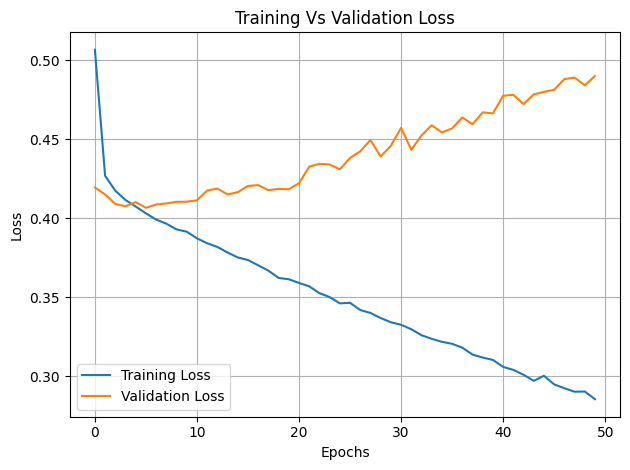

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

#Load the Data
data = pd.read_csv('Telco-Customer-Churn.csv')

#PreProcessing the data
data.drop(['customerID'], axis = 1, inplace = True)
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'] , errors = 'coerce')
data.dropna(inplace = True)

#Label encode categorical features
for column in data.select_dtypes(include = 'object').columns:
  if column != 'Churn':
    data[column] = LabelEncoder().fit_transform(data[column])

#Encode Target
data['Churn'] = data['Churn'].map({'Yes': 1 , 'No':0})

#Split the data
X = data.drop('Churn', axis = 1)
Y= data['Churn']
X_train ,X_test , Y_train, Y_test = train_test_split(X,Y,test_size = 0.2 ,random_state = 42)

#Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


#Building the Model
model = Sequential([
    Dense(64 , activation = 'relu', input_shape =(X_train.shape[1],)),
    Dense(32, activation = 'relu'),
    Dense(1, activation = 'sigmoid')

])


#Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss = 'binary_crossentropy' , metrics = ['accuracy'])

#Training the model
history = model.fit(X_train , Y_train , epochs = 50 , batch_size = 32 ,validation_split = 0.2 , verbose = 1)

#Evaluation
loss,accuracy = model.evaluate(X_test , Y_test , verbose = 0)
print(f"\n ✅ Test Accuracy: {accuracy: .4f}")

#Plotting the Loss Curve
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Vs Validation Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6807 - loss: 0.5530 - val_accuracy: 0.8053 - val_loss: 0.4183
Epoch 2/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7941 - loss: 0.4289 - val_accuracy: 0.8044 - val_loss: 0.4139
Epoch 3/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8026 - loss: 0.4083 - val_accuracy: 0.8071 - val_loss: 0.4100
Epoch 4/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8040 - loss: 0.4118 - val_accuracy: 0.8098 - val_loss: 0.4070
Epoch 5/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8189 - loss: 0.3931 - val_accuracy: 0.8053 - val_loss: 0.4110
Epoch 6/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8184 - loss: 0.3979 - val_accuracy: 0.8080 - val_loss: 0.4080
Epoch 7/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8108 - loss: 0.3961 - val_accuracy: 0.8107 - val_loss: 0.4115
Epoch 8/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8258 - loss: 0.3801 - val_accuracy: 0.8018 - val_

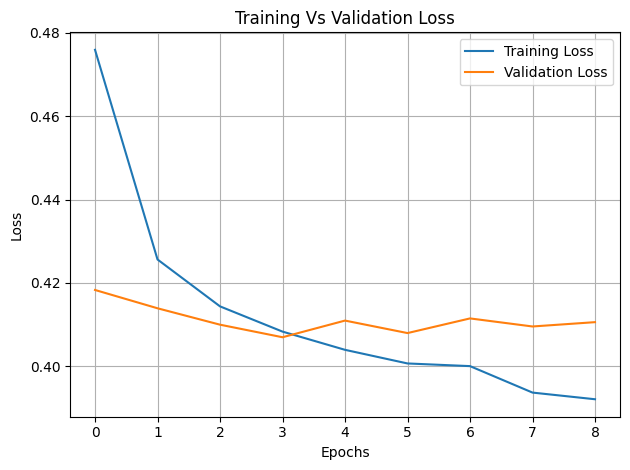

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

#Load the Data
data = pd.read_csv('Telco-Customer-Churn.csv')

#PreProcessing the data
data.drop(['customerID'], axis = 1, inplace = True)
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'] , errors = 'coerce')
data.dropna(inplace = True)

#Label encode categorical features
for column in data.select_dtypes(include = 'object').columns:
  if column != 'Churn':
    data[column] = LabelEncoder().fit_transform(data[column])

#Encode Target
data['Churn'] = data['Churn'].map({'Yes': 1 , 'No':0})

#Split the data
X = data.drop('Churn', axis = 1)
Y= data['Churn']
X_train ,X_test , Y_train, Y_test = train_test_split(X,Y,test_size = 0.2 ,random_state = 42)

#Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


#Building the Model
model = Sequential([
    Dense(64 , activation = 'relu', input_shape =(X_train.shape[1],)),
    Dense(32, activation = 'relu'),
    Dense(1, activation = 'sigmoid')

])


#Compile the model
model.compile(optimizer = 'adam' ,loss = 'binary_crossentropy' , metrics = ['accuracy'])

# 7. EarlyStopping callback
early_stop = EarlyStopping(
    monitor='val_loss',       # Watch validation loss
    patience=5,               # Stop after 5 epochs with no improvement
    restore_best_weights=True,
    verbose=1
)

#Training the model
history = model.fit(X_train , Y_train , epochs = 50 , batch_size = 32 ,validation_split = 0.2 ,callbacks=[early_stop], verbose = 1)

#Evaluation
loss,accuracy = model.evaluate(X_test , Y_test , verbose = 0)
print(f"\n ✅ Test Accuracy: {accuracy: .4f}")

#Plotting the Loss Curve
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Vs Validation Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7629 - loss: 0.4881 - val_accuracy: 0.8044 - val_loss: 0.4102
Epoch 2/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8039 - loss: 0.4251 - val_accuracy: 0.8062 - val_loss: 0.4109
Epoch 3/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8037 - loss: 0.4164 - val_accuracy: 0.8044 - val_loss: 0.4208
Epoch 4/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8127 - loss: 0.4055 - val_accuracy: 0.7973 - val_loss: 0.4153
Epoch 5/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8081 - loss: 0.4116 - val_accuracy: 0.8053 - val_loss: 0.4053
Epoch 6/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8090 - loss: 0.3947 - val_accuracy: 0.8000 - val_loss: 0.4099
Epoch 7/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8062 - loss: 0.4026 - val_accuracy: 0.8036 - val_loss: 0.4217
Epoch 8/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8140 - loss: 0.4000 - val_accuracy: 0.8027 - val

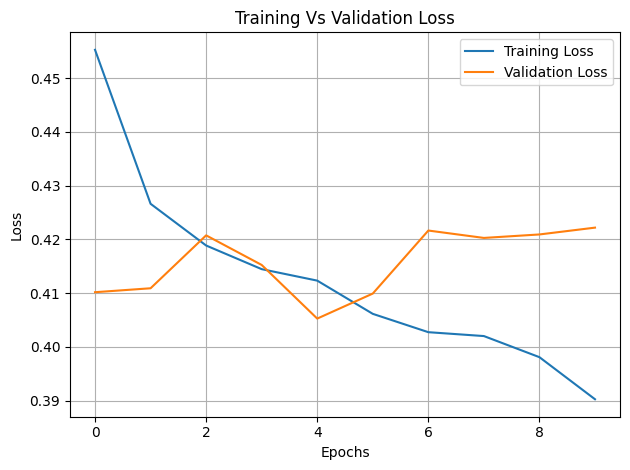

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

#Load the Data
data = pd.read_csv('Telco-Customer-Churn.csv')

#PreProcessing the data
data.drop(['customerID'], axis = 1, inplace = True)
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'] , errors = 'coerce')
data.dropna(inplace = True)

#Label encode categorical features
for column in data.select_dtypes(include = 'object').columns:
  if column != 'Churn':
    data[column] = LabelEncoder().fit_transform(data[column])

#Encode Target
data['Churn'] = data['Churn'].map({'Yes': 1 , 'No':0})

#Split the data
X = data.drop('Churn', axis = 1)
Y= data['Churn']
X_train ,X_test , Y_train, Y_test = train_test_split(X,Y,test_size = 0.2 ,random_state = 42)

#Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


#Building the Model
model = Sequential([
    Dense(270 , activation = 'relu', input_shape =(X_train.shape[1],)),
    Dropout(0.3),  # Regularization
    Dense(270, activation = 'relu'),
    Dropout(0.2),  # Regularization
    Dense(1, activation = 'sigmoid')

])


#Compile the model
model.compile(optimizer = 'adam' ,loss = 'binary_crossentropy' , metrics = ['accuracy'])

# 7. EarlyStopping callback
early_stop = EarlyStopping(
    monitor='val_loss',       # Watch validation loss
    patience=5,               # Stop after 5 epochs with no improvement
    restore_best_weights=True,
    verbose=1
)

#Training the model
history = model.fit(X_train , Y_train , epochs = 50 , batch_size = 32 ,validation_split = 0.2 ,callbacks=[early_stop], verbose = 1)

#Evaluation
loss,accuracy = model.evaluate(X_test , Y_test , verbose = 0)
print(f"\n ✅ Test Accuracy: {accuracy: .4f}")

#Plotting the Loss Curve
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Vs Validation Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


141/141 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7523 - loss: 0.7539 - val_accuracy: 0.7929 - val_loss: 0.5773
Epoch 2/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7997 - loss: 0.5674 - val_accuracy: 0.8053 - val_loss: 0.5234
Epoch 3/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8046 - loss: 0.5199 - val_accuracy: 0.8071 - val_loss: 0.4881
Epoch 4/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8022 - loss: 0.4859 - val_accuracy: 0.8098 - val_loss: 0.4706
Epoch 5/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8103 - loss: 0.4696 - val_accuracy: 0.8160 - val_loss: 0.4560
Epoch 6/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7986 - loss: 0.4609 - val_accuracy: 0.8009 - val_loss: 0.4654
Epoch 7/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8172 - loss: 0.4392 - val_accuracy: 0.8018 - val_loss: 0.4463
Epoch 8/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8216 - loss: 0.4365 - val_accuracy: 0.7991 - val_

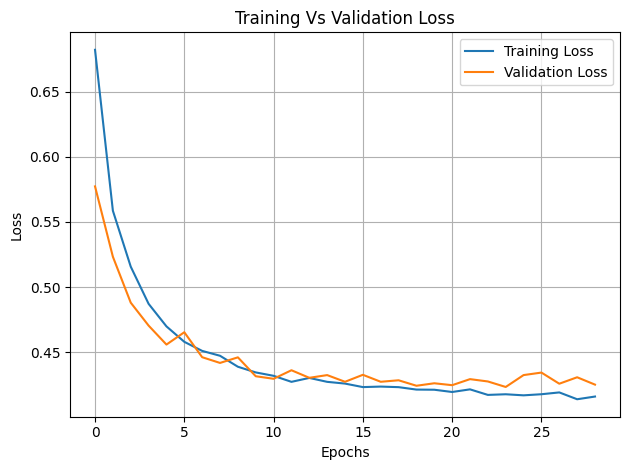

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , LabelEncoder
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

#Load the Data
data = pd.read_csv('Telco-Customer-Churn.csv')

#PreProcessing the data
data.drop(['customerID'], axis = 1, inplace = True)
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'] , errors = 'coerce')
data.dropna(inplace = True)

#Label encode categorical features
for column in data.select_dtypes(include = 'object').columns:
  if column != 'Churn':
    data[column] = LabelEncoder().fit_transform(data[column])

#Encode Target
data['Churn'] = data['Churn'].map({'Yes': 1 , 'No':0})

#Split the data
X = data.drop('Churn', axis = 1)
Y= data['Churn']
X_train ,X_test , Y_train, Y_test = train_test_split(X,Y,test_size = 0.2 ,random_state = 42)

#Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


#Building the Model
model = Sequential([
    Dense(270 , activation = 'relu', kernel_regularizer=l2(0.001), input_shape =(X_train.shape[1],)),
    Dropout(0.3),  # Regularization
    Dense(270, activation = 'relu' , kernel_regularizer=l2(0.001)),
    Dropout(0.2),  # Regularization
    Dense(1, activation = 'sigmoid')

])


#Compile the model
model.compile(optimizer = 'adam' ,loss = 'binary_crossentropy' , metrics = ['accuracy'])

# 7. EarlyStopping callback
early_stop = EarlyStopping(
    monitor='val_loss',       # Watch validation loss
    patience=5,               # Stop after 5 epochs with no improvement
    restore_best_weights=True,
    verbose=1
)

#Training the model
history = model.fit(X_train , Y_train , epochs = 50 , batch_size = 32 ,validation_split = 0.2 ,callbacks=[early_stop], verbose = 1)

#Evaluation
loss,accuracy = model.evaluate(X_test , Y_test , verbose = 0)
print(f"\n ✅ Test Accuracy: {accuracy: .4f}")

#Plotting the Loss Curve
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Vs Validation Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


141/141 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.5906 - loss: 1.1110 - val_accuracy: 0.7378 - val_loss: 0.8956
Epoch 2/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7243 - loss: 0.9111 - val_accuracy: 0.7751 - val_loss: 0.8213
Epoch 3/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7468 - loss: 0.8784 - val_accuracy: 0.8071 - val_loss: 0.7744
Epoch 4/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7678 - loss: 0.8149 - val_accuracy: 0.8009 - val_loss: 0.7556
Epoch 5/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7763 - loss: 0.8038 - val_accuracy: 0.8089 - val_loss: 0.7342
Epoch 6/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7760 - loss: 0.7826 - val_accuracy: 0.8124 - val_loss: 0.7212
Epoch 7/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7731 - loss: 0.7715 - val_accuracy: 0.8116 - val_loss: 0.7093
Epoch 8/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7772 - loss: 0.7481 - val_accuracy: 0.814

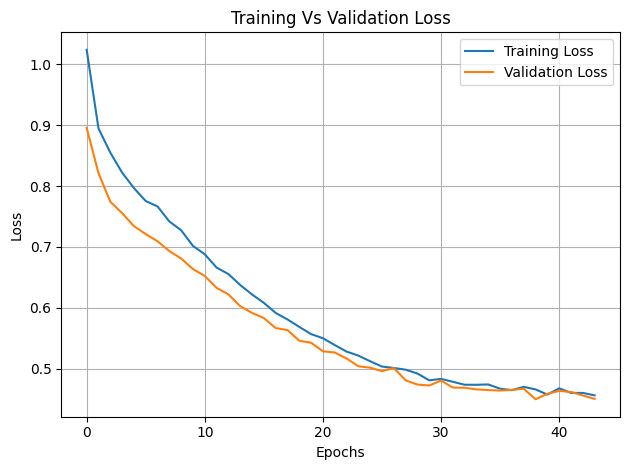

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , LabelEncoder
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization

#Load the Data
data = pd.read_csv('Telco-Customer-Churn.csv')

#PreProcessing the data
data.drop(['customerID'], axis = 1, inplace = True)
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'] , errors = 'coerce')
data.dropna(inplace = True)

#Label encode categorical features
for column in data.select_dtypes(include = 'object').columns:
  if column != 'Churn':
    data[column] = LabelEncoder().fit_transform(data[column])

#Encode Target
data['Churn'] = data['Churn'].map({'Yes': 1 , 'No':0})

#Split the data
X = data.drop('Churn', axis = 1)
Y= data['Churn']
X_train ,X_test , Y_train, Y_test = train_test_split(X,Y,test_size = 0.2 ,random_state = 42)

#Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


#Building the Model
model = Sequential([
    Dense(256, activation = 'relu', kernel_regularizer=l2(0.001), input_shape =(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.5),  # Regularization
    Dense(128, activation = 'relu' , kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.4),
    Dense(64, activation = 'relu' , kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.3),  # Regularization
    Dense(32, activation = 'relu' , kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.2),
    Dense(32, activation = 'relu' , kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.2),
    Dense(1, activation = 'sigmoid')

])
# 4. Compile with a fixed learning rate so ReduceLROnPlateau can adjust it
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(
    optimizer=optimizer,
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# 5. Callbacks (no ModelCheckpoint)
callbacks = [
    EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True,
        verbose=1
    ),
    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=3,
        min_lr=1e-6,
        verbose=1
    )
]


#Compile the model
model.compile(optimizer = 'adam' ,loss = 'binary_crossentropy' , metrics = ['accuracy'])

# 7. EarlyStopping callback
early_stop = EarlyStopping(
    monitor='val_loss',       # Watch validation loss
    patience=5,               # Stop after 5 epochs with no improvement
    restore_best_weights=True,
    verbose=1
)

#Training the model
history = model.fit(X_train , Y_train , epochs = 100 , batch_size = 32 ,validation_split = 0.2 ,callbacks=[early_stop], verbose = 1)

#Evaluation
loss,accuracy = model.evaluate(X_test , Y_test , verbose = 0)
print(f"\n ✅ Test Accuracy: {accuracy: .4f}")

#Plotting the Loss Curve
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Vs Validation Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()